##### import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

##### calculate hamming distance

In [2]:
def hamming_distance(s1, s2):
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))


##### provide nucleotide bases

In [3]:
bases = ['A', 'C', 'G', 'T']

##### calculate frequency of kmer

In [4]:
import kaos
kmer_length =10
file_path_Ecoli = "data_fig1/GCF_000017985.1_ASM1798v1_genomic.fna"
fcgr_sequence_Ecoli = kaos.kaos_fcgr().chaos_frequency_dictionary(fasta_string= kaos.Read().read_fasta_removing_non_atgc(file_path_Ecoli), kmer_length=kmer_length, pseudo_count=True)

##### number sample to withdraw

In [5]:
no_of_sample = 100000

In [6]:
df = pd.DataFrame(columns = ["hamming_distance", "type", "random_selected1", "altered_kmer"])

for hamming_distance in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

    lst_hamming = list()

    tmp = pd.DataFrame(columns = ["hamming_distance", "type", "random_selected1",  "altered_kmer"])


    kmer_list_random1 = random.sample(list(fcgr_sequence_Ecoli.keys()), k= no_of_sample)
    kmer_list_random2 = random.sample(list(fcgr_sequence_Ecoli.keys()), k= no_of_sample)


    tmp["random_selected1"] = kmer_list_random1
    tmp["altered_kmer"] = kmer_list_random2
    tmp["hamming_distance"] = hamming_distance
    tmp["type"] = "random"

    df = pd.concat([df, tmp])

    for kmer_selected in kmer_list_random1:


        pos_selected =None
        pos_selected = random.sample(list(range(0,len(kmer_selected))), k = hamming_distance)

        string_list = kmer_selected

        for i in range(len(pos_selected)):
            nucleotide_at_position = None
            random_nucleotide = None

            nucleotide_at_position = kmer_selected[pos_selected[i]]
            random_nucleotide = random.sample({"A", "T","G", "C"} -{nucleotide_at_position}, k=1)
            # print(nucleotide_at_position, random_nucleotide)


            string_list = list(string_list)
            string_list[pos_selected[i]] = random_nucleotide[0]

        new_string = ''.join(string_list)

        string_list=None

        lst_hamming.append(new_string)



    tmp = pd.DataFrame(columns = ["hamming_distance", "type", "random_selected1",  "altered_kmer"])

    

    tmp["random_selected1"] = kmer_list_random1
    tmp["altered_kmer"] = lst_hamming
    tmp["hamming_distance"] = hamming_distance
    tmp["type"] = "original"

    df = pd.concat([df, tmp])
df.reset_index(inplace=True, drop=True)



/tmp/ipykernel_1253144/3780202000.py:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nucleotide = random.sample({"A", "T","G", "C"} -{nucleotide_at_position}, k=1)
/tmp/ipykernel_1253144/3780202000.py:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nucleotide = random.sample({"A", "T","G", "C"} -{nucleotide_at_position}, k=1)
/tmp/ipykernel_1253144/3780202000.py:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nucleotide = random.sample({"A", "T","G", "C"} -{nucleotide_at_position}, k=1)
/tmp/ipykernel_1253144/3780202000.py:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nucleotide = random.sample({"A", "T","G", "C"} -{nucleotide_at_position}, k=1)
/tmp/ipykernel_1253144/378020200

In [7]:
df

,hamming_distance,type,random_selected1,altered_kmer
0,1,random,TCTGAAACAC,AGGAAGGCCC
1,1,random,AAGCTATTTA,TCCGTCAAGT
2,1,random,GTAAAGTGAT,TCATGCGGTA
3,1,random,CGTACCACAC,GGTATCCTCG
4,1,random,CTTGACGCAT,AGGCGGTACA
...,...,...,...,...
1999995,10,original,TCGCACGGCT,CAAAGTCTGC
1999996,10,original,ATTCAATTTG,TAGGGCCCAA
1999997,10,original,GAAGTCGACC,ATCTAAATGG
1999998,10,original,CTCCTCTCGT,GAATGAAGAA


In [8]:
df["category"] = np.where(df['hamming_distance'] > 3, ">3", df['hamming_distance'])
df

,hamming_distance,type,random_selected1,altered_kmer,category
0,1,random,TCTGAAACAC,AGGAAGGCCC,1
1,1,random,AAGCTATTTA,TCCGTCAAGT,1
2,1,random,GTAAAGTGAT,TCATGCGGTA,1
3,1,random,CGTACCACAC,GGTATCCTCG,1
4,1,random,CTTGACGCAT,AGGCGGTACA,1
...,...,...,...,...,...
1999995,10,original,TCGCACGGCT,CAAAGTCTGC,>3
1999996,10,original,ATTCAATTTG,TAGGGCCCAA,>3
1999997,10,original,GAAGTCGACC,ATCTAAATGG,>3
1999998,10,original,CTCCTCTCGT,GAATGAAGAA,>3


##### Filter the 100000 rows with hamming distance 1, 2,3, and 100000 rows from rest of the hamming distance.

In [9]:
df_filtered =    pd.concat([df[df["hamming_distance"].isin([1, 2, 3])],  df[(df["hamming_distance"].isin([4, 5, 6, 7, 8,9])) & (df["type"].isin(["original"]))].sample(no_of_sample), df[(df["hamming_distance"].isin([4, 5, 6, 7, 8,9])) & (df["type"].isin(["random"]))].sample(no_of_sample)]) 
df_filtered

,hamming_distance,type,random_selected1,altered_kmer,category
0,1,random,TCTGAAACAC,AGGAAGGCCC,1
1,1,random,AAGCTATTTA,TCCGTCAAGT,1
2,1,random,GTAAAGTGAT,TCATGCGGTA,1
3,1,random,CGTACCACAC,GGTATCCTCG,1
4,1,random,CTTGACGCAT,AGGCGGTACA,1
...,...,...,...,...,...
1438070,8,random,GTTCGGTTGG,GAGCTAGCGA,>3
1407619,8,random,GAAGTAAGTG,ATCTTTTGGA,>3
854269,5,random,TTTCATCAAT,GATAAAAGGC,>3
1659263,9,random,TAGCAATGGC,CCGTTCTTAG,>3


In [10]:
# Convert DataFrame columns to lists
random_selected1_values = df_filtered["random_selected1"].tolist()
altered_kmer_values = df_filtered["altered_kmer"].tolist()

# Use list comprehension or map() function to retrieve values from dictionary
freq_random_selected1_values = [fcgr_sequence_Ecoli[value] for value in random_selected1_values]
freq_altered_kmer_values = [fcgr_sequence_Ecoli[value] for value in altered_kmer_values]

# Assign the resulting lists to DataFrame columns
df_filtered["freq_random_selected1"] = freq_random_selected1_values
df_filtered["freq_altered_kmer"] = freq_altered_kmer_values

In [11]:
# for i in range(df.shape[0]):

#     df.loc[i, "freq_random_selected1"] = fcgr_sequence_Ecoli[df.loc[i, "random_selected1"]]
#     df.loc[i, "freq_altered_kmer"] = fcgr_sequence_Ecoli[df.loc[i, "altered_kmer"]]

##### Obtain the frequency difference

In [12]:
df_filtered["freq_absolute_difference"] = np.abs(df_filtered["freq_random_selected1"] - df_filtered["freq_altered_kmer"])

In [13]:
df_filtered

,hamming_distance,type,random_selected1,altered_kmer,category,freq_random_selected1,freq_altered_kmer,freq_absolute_difference
0,1,random,TCTGAAACAC,AGGAAGGCCC,1,2.0,3.0,1.0
1,1,random,AAGCTATTTA,TCCGTCAAGT,1,6.0,2.0,4.0
2,1,random,GTAAAGTGAT,TCATGCGGTA,1,6.0,9.0,3.0
3,1,random,CGTACCACAC,GGTATCCTCG,1,3.0,1.0,2.0
4,1,random,CTTGACGCAT,AGGCGGTACA,1,1.0,6.0,5.0
...,...,...,...,...,...,...,...,...
1438070,8,random,GTTCGGTTGG,GAGCTAGCGA,>3,6.0,1.0,5.0
1407619,8,random,GAAGTAAGTG,ATCTTTTGGA,>3,4.0,3.0,1.0
854269,5,random,TTTCATCAAT,GATAAAAGGC,>3,20.0,9.0,11.0
1659263,9,random,TAGCAATGGC,CCGTTCTTAG,>3,5.0,1.0,4.0


##### function for figure axis object

In [14]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True, rotation=90):
    
        
    """
    Customize the appearance of matplotlib axis for a figure.
    
    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.
    
    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=rotation)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax

##### Boxplot of distribution

/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categoric

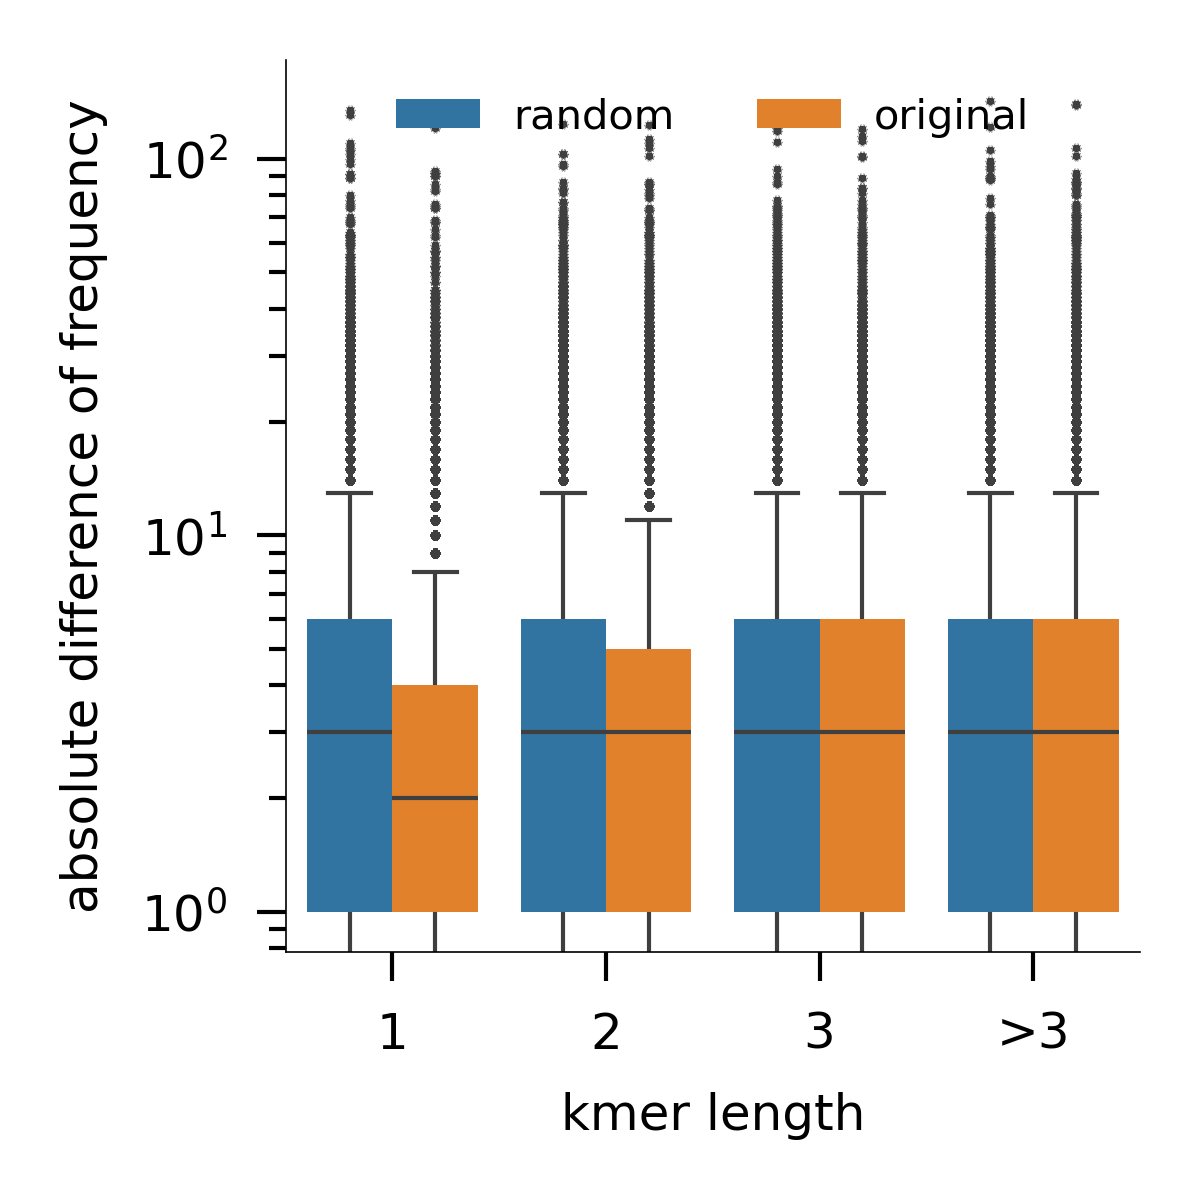

In [24]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize = (2.1,2.1), dpi = 600, sharex=True)
ax = sns.boxplot(df_filtered, x = "category", y = "freq_absolute_difference", hue = "type", ax=ax, linewidth = 0.5, boxprops=dict(linewidth=0),  flierprops=dict(marker='*', markerfacecolor='black', markersize=0.5))
ax.set_yscale('log')
ax = custom_figure_axis(ax, fontsize=6, show_ticks = True, rotation=0)
ax.legend(ncol = 2, fontsize=5, frameon=False)
ax.set_xlabel("kmer length")
ax.set_ylabel("absolute difference of frequency")
plt.tight_layout()
plt.savefig("random_fcgr_latest.pdf", dpi = 600)


##### Ontain category wise p value

In [16]:
from scipy.stats import mannwhitneyu

for i in [1, 2, 3, '>3']:

    tmp = df_filtered[df_filtered.loc[:, "category"]==i]

    res, p  = mannwhitneyu(tmp[tmp.loc[:, "type"]=="random"]["freq_absolute_difference"], tmp[tmp.loc[:, "type"]=="original"]["freq_absolute_difference"], alternative='greater', nan_policy = "omit")
    
    
    print("The one sided mannwhitneyu between random and original kmer distribution for hamming distance " + str(i) + " is " + str(p))
    # print(i, p)
    # ut
    # tmpa
    # break

The one sided mannwhitneyu between random and original kmer distribution for hamming distance 1 is 0.0
The one sided mannwhitneyu between random and original kmer distribution for hamming distance 2 is 0.0
The one sided mannwhitneyu between random and original kmer distribution for hamming distance 3 is 1.5650776429431026e-89
The one sided mannwhitneyu between random and original kmer distribution for hamming distance >3 is 0.09714570253344701
